## Analysis of famous Titanic dataset taken from [Kaggle.com](https://www.kaggle.com/c/titanic)

This is my first Data Science mini-project.
The goal of this analysis is to predict wheather or not passenger of Titanic survived.

### 1. Exploratory Data Analysis (EDA)

In [1]:
#imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#below: two powerfull libraries for automatic data visualization
# import pandas_profiling
# from autoviz.AutoViz_Class import AutoViz_Class

In [2]:
df_train = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\train.csv')
df_test = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\test.csv')
df_all = pd.concat([df_train,df_test])

In [3]:
df_all.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
150,1042,NaN,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C
340,1232,NaN,2,"Fillbrook, Mr. Joseph Charles",male,18.0,0,0,C.A. 15185,10.5000,NaN,S
457,458,1.0,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
883,884,0.0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
90,982,NaN,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S


Studied data have 11 features and 1 target value. There meaning is as follows:

* PassengerId is the unique id of the row and it doesn't have any effect on target
* Survived is the target variable we are trying to predict (0 or 1):
    * 1 = Survived
    * 0 = Not Survived
* Pclass is Passenger Class. It is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
    * 1 = Upper Class
    * 2 = Middle Class
    * 3 = Lower Class
* Name, Sex and Age are self-explanatory
* SibSp is the total number of the passengers' siblings and spouse
* Parch is the total number of the passengers' parents and children
* Ticket is the ticket number of the passenger
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In concatenated dataset we have some missing values:
* Survived - only training data contain this information, it is obvious
* Age - over 250 missing values
* Fare - 1 missing value
* Cabin - most of values are missing
* Embarked - 2 missing values

Let's see how it look like in training set and test set separately.

In [5]:
sum_missing_train = df_train.isnull().sum()
sum_missing_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
sum_missing_test = df_test.isnull().sum()
sum_missing_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

I will deal with missing values in next section.

In [7]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [8]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


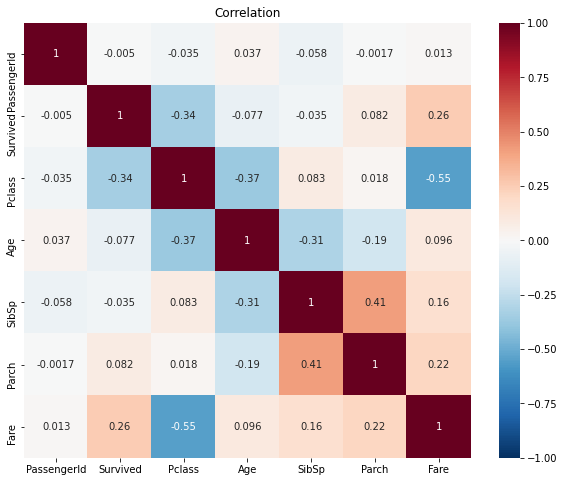

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu_r')
plt.title('Correlation')
plt.show()

In [10]:
# report_train = pandas_profiling.ProfileReport(df_train)
# report_train

In [11]:
#AV = AutoViz_Class()

## Let's now visualize the plots generated by AutoViz.
#report_train_AV = AV.AutoViz("train.csv")

Let's check first how many passengers survived.

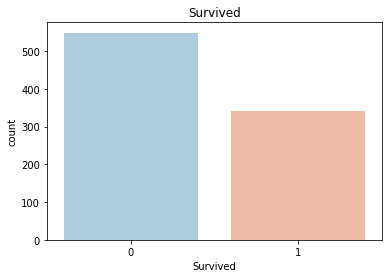

In [12]:
fig = plt.figure()
sns.countplot(x='Survived', data=df_train, palette='RdBu_r')
plt.title('Survived')
plt.show()

Most of passengers from training set died in disaster.

Now I will look at all of features in dataset separatly to describe and visualise their impact on target value separately.

### Sex
Let's check how survival depend on sex.

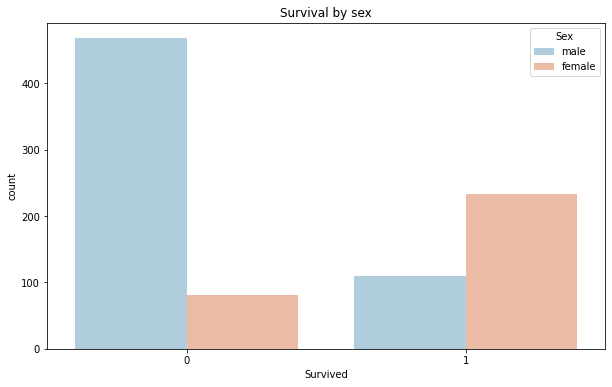

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=df_train, hue='Sex',palette='RdBu_r')
plt.title('Survival by sex')
plt.show()

As seen above, survival is very sex-dependent. Most of females survived, whereas most of males died in disaster.

### Pclass
Now let's check how survival depends on passenger class.

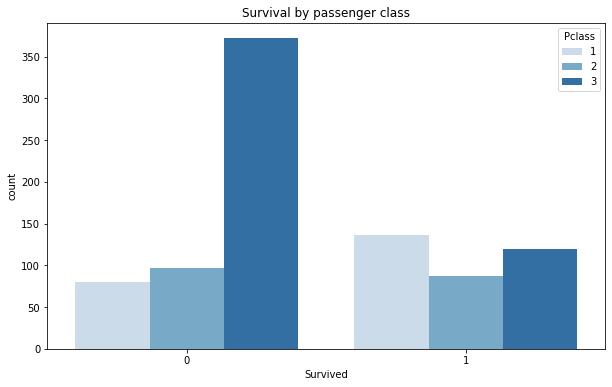

In [14]:
plt.figure(figsize=(10,6))
plt.title('Survival by passenger class')
sns.countplot(x='Survived', data=df_train, hue='Pclass', palette='Blues')
plt.show()

Most of passengers from 3rd class died, most of passengers from 1st class survived. Socio-economic status had much influence on survival.

### Age

c:\users\joanna\appdata\local\programs\python\python39\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\joanna\appdata\local\programs\python\python39\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


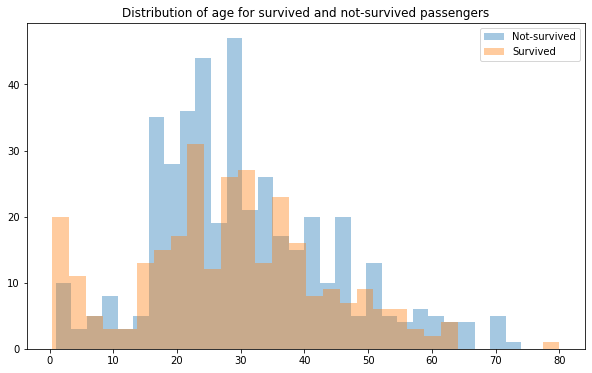

In [15]:
plt.figure(figsize=(10,6))
sns.distplot([df_train[df_train['Survived']==0]['Age']],bins=30, kde=False, label='Not-survived')
sns.distplot([df_train[df_train['Survived']==1]['Age']],bins=30, kde=False, label='Survived')
plt.title('Distribution of age for survived and not-survived passengers')
plt.legend()
plt.show()

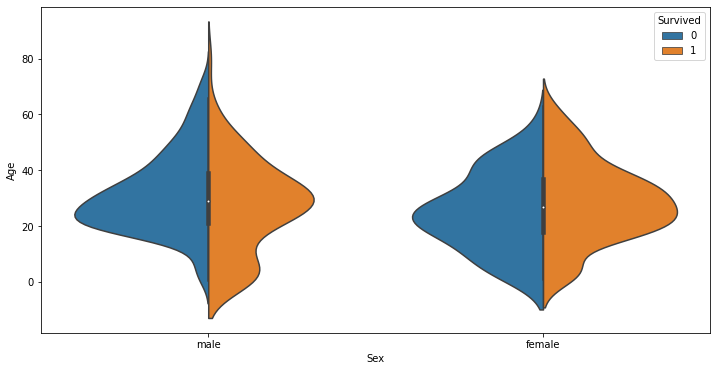

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='Sex', y='Age', hue = 'Survived', data=df_train, split=True)
plt.show()

Looking at above visualisations we could conclude, that the most passengers that didn't survived the disaster was in middle age (about 15-60 years old). But this information is not clearly visible since number of passengers has nearly gaussian distibution. Therefore I decided to introduce new feature which is percentage of passengers who survived and not-survived and were in specific age, respectively. 

In [17]:
df_train['Age'] = df_train['Age'].dropna().round().astype(int)
survival_by_age = pd.pivot_table(data=df_train, values='PassengerId', index='Age', columns='Survived',  aggfunc='count', fill_value=0)
survival_by_age['Percentage survived'] = round(survival_by_age[1]/(survival_by_age[0]+survival_by_age[1])*100,1)
survival_by_age['Percentage not-survived'] = 100 - survival_by_age['Percentage survived']
survival_by_age.head(20)

Survived,0,1,Percentage survived,Percentage not-survived
Age,,,,
0.0,0,1,100.0,0.0
1.0,2,11,84.6,15.4
2.0,7,3,30.0,70.0
3.0,1,5,83.3,16.7
4.0,3,7,70.0,30.0
5.0,0,4,100.0,0.0
6.0,1,2,66.7,33.3
7.0,2,1,33.3,66.7
8.0,2,2,50.0,50.0


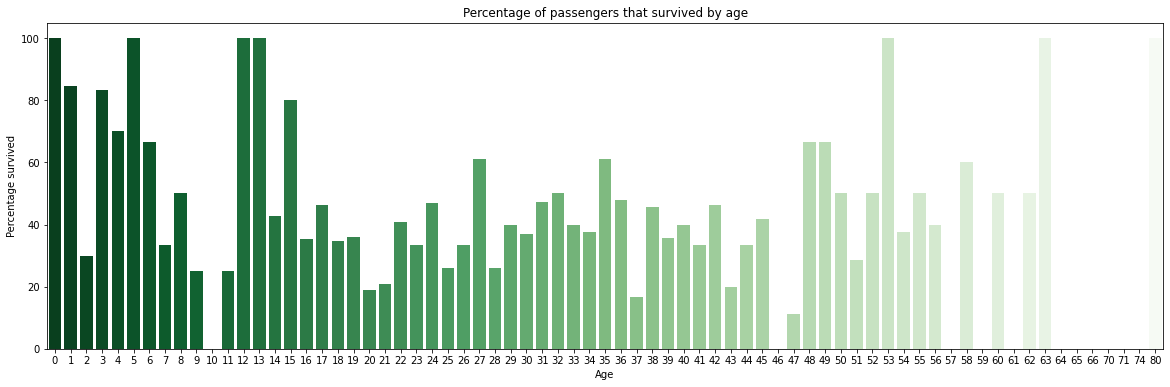

In [18]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x=survival_by_age.index, y='Percentage survived',data=survival_by_age, palette='Greens_r')
ax.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
plt.title('Percentage of passengers that survived by age')
plt.show()

Since survival rate is highly dependent on sex, let's analyze our data in sex-dependent manner.

In [19]:
survival_by_age_and_sex = pd.pivot_table(data=df_train, values='PassengerId', index=['Age','Sex'], columns='Survived',  aggfunc='count', fill_value=0)
survival_by_age_and_sex['Percentage survived'] = round(survival_by_age_and_sex[1]/(survival_by_age_and_sex[0]+survival_by_age_and_sex[1])*100,1)
survival_by_age_and_sex['Percentage not-survived'] = 100 - survival_by_age_and_sex['Percentage survived']
survival_by_age_and_sex.head(10)

Survived    0  1  Percentage survived  Percentage not-survived
Age Sex                                                       
0.0 male    0  1                100.0                      0.0
1.0 female  0  4                100.0                      0.0
    male    2  7                 77.8                     22.2
2.0 female  4  2                 33.3                     66.7
    male    3  1                 25.0                     75.0
3.0 female  1  1                 50.0                     50.0
    male    0  4                100.0                      0.0
4.0 female  0  5                100.0                      0.0
    male    3  2                 40.0                     60.0
5.0 female  0  4                100.0                      0.0

In [20]:
survival_by_age_and_sex = survival_by_age_and_sex.unstack(level=1,fill_value=0)
survival_by_age_and_sex.head()

Survived      0           1      Percentage survived         \
Sex      female male female male              female   male   
Age                                                           
0.0           0    0      0    1                 0.0  100.0   
1.0           0    2      4    7               100.0   77.8   
2.0           4    3      2    1                33.3   25.0   
3.0           1    0      1    4                50.0  100.0   
4.0           0    3      5    2               100.0   40.0   

Survived Percentage not-survived        
Sex                       female  male  
Age                                     
0.0                          0.0   0.0  
1.0                          0.0  22.2  
2.0                         66.7  75.0  
3.0                         50.0   0.0  
4.0                          0.0  60.0

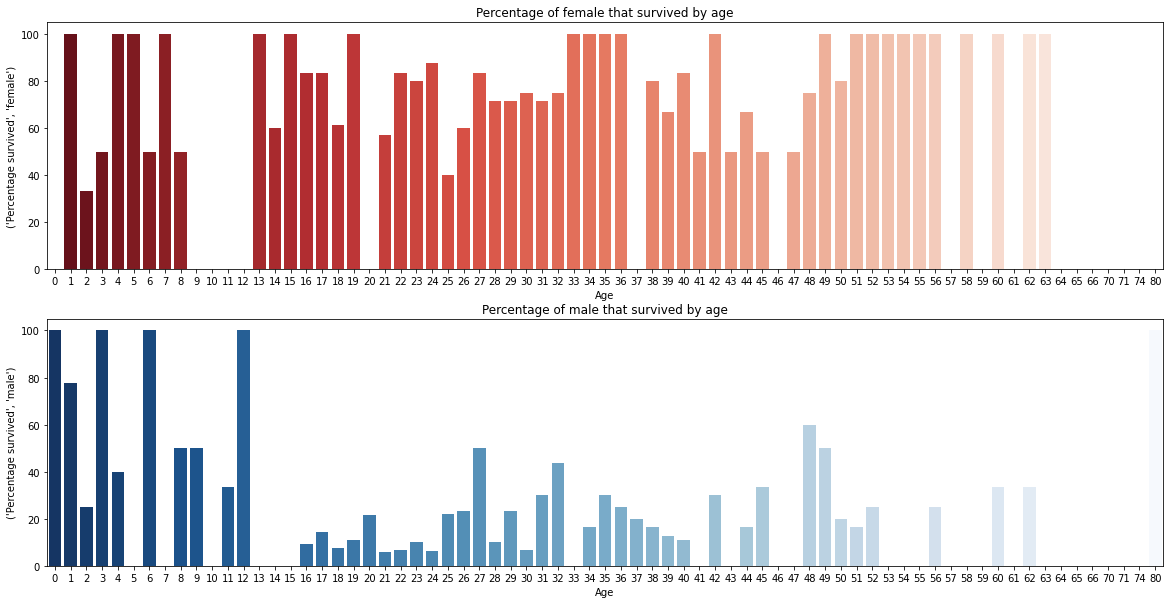

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.barplot(x=survival_by_age_and_sex.index, y=('Percentage survived', 'female'),data=survival_by_age_and_sex, palette='Reds_r', ax=ax1)
ax1.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
ax1.set_title('Percentage of female that survived by age')

sns.barplot(x=survival_by_age_and_sex.index, y=('Percentage survived', 'male'),data=survival_by_age_and_sex, palette="Blues_r", ax=ax2)
ax2.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
ax2.set_title('Percentage of male that survived by age')

plt.show()

Passenger age by class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

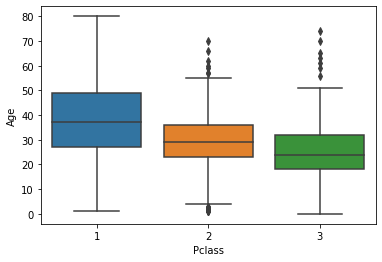

In [22]:
sns.boxplot(x='Pclass', y='Age', data=df_train)

As expected, the better class, the higher age of passengers in that class. Is sounds logical, since younger people are usually not very wealthy. I will use this information to deal with missing values in the next section.

Now it is clearly visible that most of females who didn't survive was roughly between 21 and 47 years old, whereas for males corresponding age range was much wider, between 16 and 62 years old.

### SibSp & Parch
Now let's look closer at family size hiden in two seperate variables: SibSp (siblings and spouse) and Parch (parents and children)

c:\users\joanna\appdata\local\programs\python\python39\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


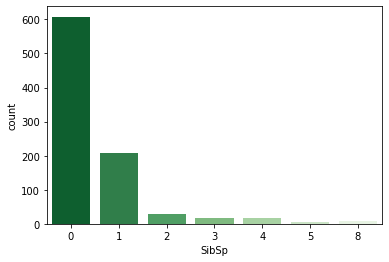

In [23]:
sns.countplot(df_train['SibSp'],palette='Greens_r')
plt.show()

c:\users\joanna\appdata\local\programs\python\python39\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


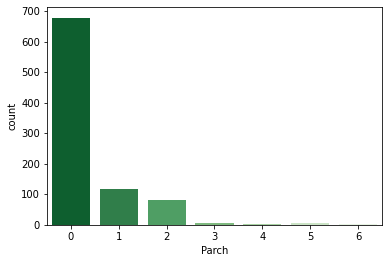

In [24]:
sns.countplot(df_train['Parch'],palette='Greens_r')
plt.show()

More natural feature seems to be total family size, so `Family_size=SibSp+Parch+1` (I add 1 since have to take passenger himself to the Family size). Let's create new feature Family describing the family size in that way.

In [25]:
df_train['Family_size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


c:\users\joanna\appdata\local\programs\python\python39\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


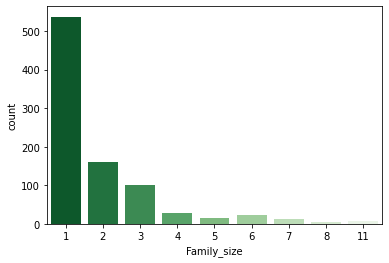

In [26]:
sns.countplot(df_train['Family_size'],palette='Greens_r')
plt.show()

In [27]:
df_train.groupby('Family_size').count()['PassengerId']

Family_size
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: PassengerId, dtype: int64

Most of passengers travelled alone.

Now let's check how survival depends on Family size.

In [28]:
survival_by_family_size = pd.pivot_table(data=df_train, values='PassengerId', index='Family_size', columns='Survived',  aggfunc='count', fill_value=0)
survival_by_family_size['Percentage survived'] = round(survival_by_family_size[1]/(survival_by_family_size[0]+survival_by_family_size[1])*100,1)
survival_by_family_size['Percentage not-survived'] = 100 - survival_by_family_size['Percentage survived']
survival_by_family_size.head(10)

Survived,0,1,Percentage survived,Percentage not-survived
Family_size,,,,
1,374,163,30.4,69.6
2,72,89,55.3,44.7
3,43,59,57.8,42.2
4,8,21,72.4,27.6
5,12,3,20.0,80.0
6,19,3,13.6,86.4
7,8,4,33.3,66.7
8,6,0,0.0,100.0
11,7,0,0.0,100.0


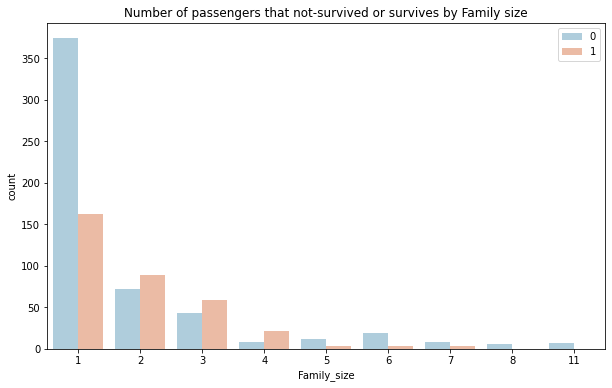

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_size', hue='Survived', data=df_train, palette='RdBu_r')
plt.legend(loc='upper right')
plt.title('Number of passengers that not-survived or survives by Family size')
plt.show()

Again let's consider percentage of families of specific size that survived or not.

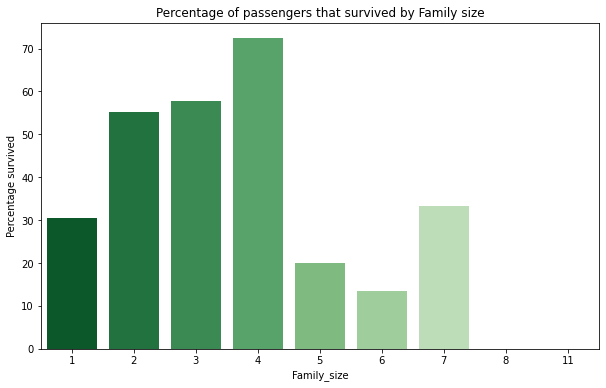

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=survival_by_family_size.index, y='Percentage survived',data=survival_by_family_size, palette='Greens_r')
ax.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
plt.title('Percentage of passengers that survived by Family size')
plt.show()

For Family size greater than 3 more passengers died than survived. Also passengers that travel alone have small propability of survival.

### Ticket

Let's check how many unique values are within Tickets.

In [31]:
df_train['Ticket'].nunique()

681

In [32]:
df_train['Ticket_frequency'] = df_train.groupby('Ticket')['Ticket'].transform('count')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


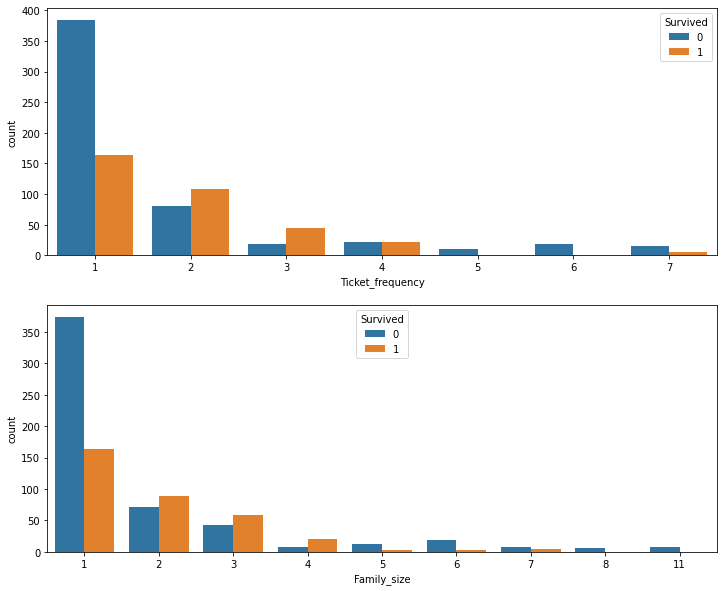

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))
sns.countplot(x='Ticket_frequency', hue='Survived', data=df_train, ax=ax1)
sns.countplot(x='Family_size', hue='Survived', data=df_train, ax=ax2)
plt.show()

In [34]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Ticket_frequency
PassengerId,1.000000,-0.005007,-0.035144,0.036859,-0.057527,-0.001652,0.012658,-0.040143,0.003355
Survived,-0.005007,1.000000,-0.338481,-0.076834,-0.035322,0.081629,0.257307,0.016639,0.038247
Pclass,-0.035144,-0.338481,1.000000,-0.369681,0.083081,0.018443,-0.549500,0.065997,-0.002633
Age,0.036859,-0.076834,-0.369681,1.000000,-0.308006,-0.189045,0.096288,-0.301721,-0.253288
SibSp,-0.057527,-0.035322,0.083081,-0.308006,1.000000,0.414838,0.159651,0.890712,0.661622
Parch,-0.001652,0.081629,0.018443,-0.189045,0.414838,1.000000,0.216225,0.783111,0.593076
Fare,0.012658,0.257307,-0.549500,0.096288,0.159651,0.216225,1.000000,0.217138,0.345541
Family_size,-0.040143,0.016639,0.065997,-0.301721,0.890712,0.783111,0.217138,1.000000,0.748487
Ticket_frequency,0.003355,0.038247,-0.002633,-0.253288,0.661622,0.593076,0.345541,0.748487,1.000000


Family size and Ticket frequency are highly corelated features - probably most of family memebers had the same ticket numbers and traveled together. Since Ticket feature has too many unique values in more detailed analysis I will drop Ticket feature and keep Ticket_Frequency.

**Warning:** We have to note that to extract Ticket frequency I used data only from training set (in order to analyse correlations of features with target value). The whole dataset has been radomly divided into training and test set by data providers, so in analysis of whole dataset Ticket frequency will change, while Family size won't.

### Fare

c:\users\joanna\appdata\local\programs\python\python39\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


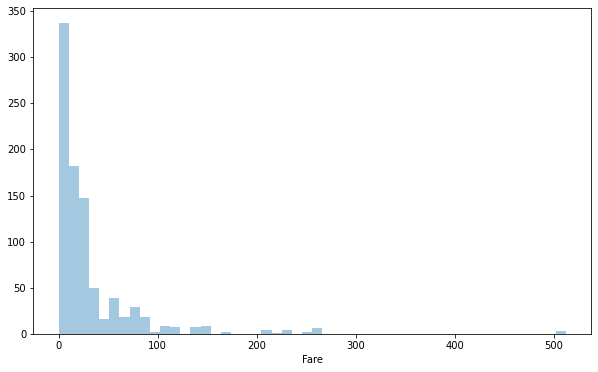

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(df_train['Fare'], kde=False)
plt.show()

In [36]:
df_train.sort_values(by='Fare', ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,3
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,3
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,3
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6,4
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,4
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6,4
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6,4
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5,2
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5,2
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,2,2


As I supposed, fare is not only related to Pclass but also depend on number of passengers. Let's create new column by dividing fare by number of passengers traveling with the same ticket number (Ticket frequency).

In [37]:
df_train['Fare_per_person'] = df_train['Fare']/df_train['Ticket_frequency']
df_train.sort_values(by='Fare_per_person', ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,1,1,221.7792
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,3,1,211.5000
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,3,170.7764
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,3,170.7764
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,3,170.7764


c:\users\joanna\appdata\local\programs\python\python39\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\joanna\appdata\local\programs\python\python39\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

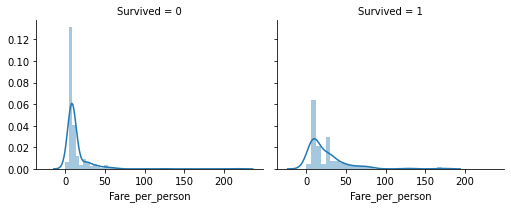

In [38]:
fig = plt.figure(figsize=(12,8))
g = sns.FacetGrid(df_train, col='Survived', aspect=1.2)
g = g.map(sns.distplot, "Fare_per_person")
plt.show()

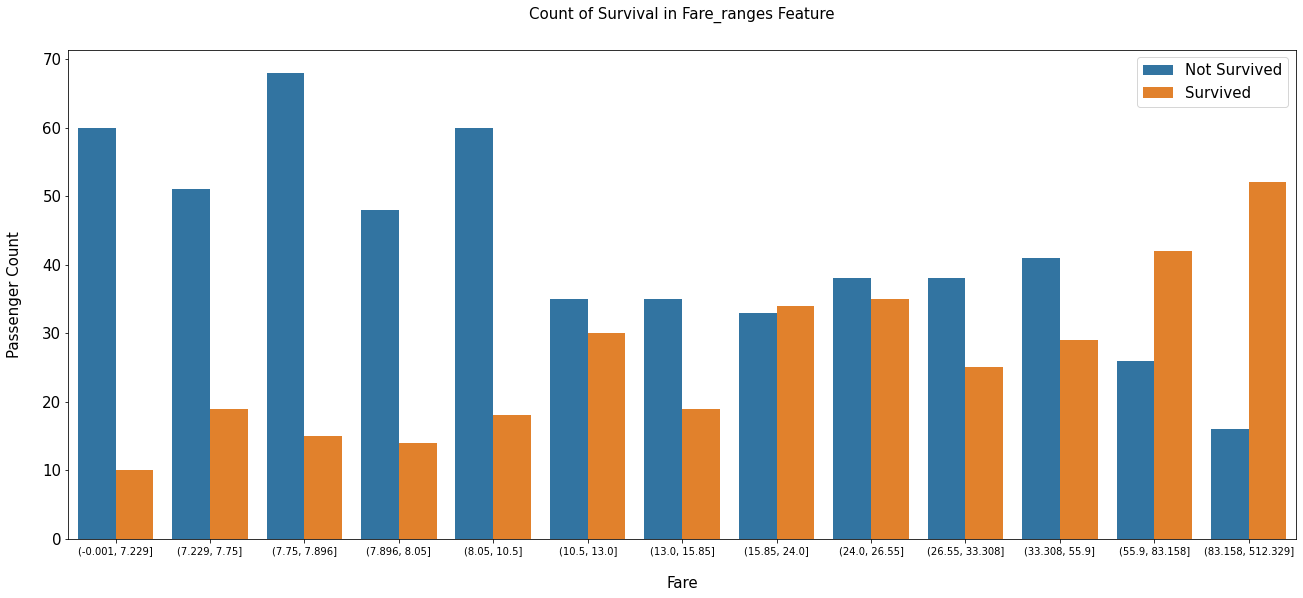

In [39]:
df_train['Fare_ranges'] = pd.qcut(df_train['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare_ranges', hue='Survived', data=df_train)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare_ranges'), size=15, y=1.05)

plt.show()

In [40]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person,Fare_ranges
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,7.2500,"(7.229, 7.75]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,71.2833,"(55.9, 83.158]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,7.9250,"(7.896, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,26.5500,"(33.308, 55.9]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,8.0500,"(7.896, 8.05]"



### Cabin

The cabin arrangement on Titanic look as follows:

<a href='https://www.wikizero.com/en/RMS_Titanic'> <img src='Titanic_side_plan_annotated_English.png' /></a>

Althought most of cabins are NaN we can analize known cabins: let's assign them do deck.

In [41]:
df_train['Deck'] = df_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'NaN')
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person,Fare_ranges,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,7.2500,"(7.229, 7.75]",NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,71.2833,"(55.9, 83.158]",C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,7.9250,"(7.896, 8.05]",NaN


In [42]:
df_deck_class = df_train.groupby(['Deck', 'Pclass']).count()
df_deck_class = df_deck_class[['Name']]
# df_deck_class.drop(df_deck_class.columns.difference(['Name']), 1, inplace=True)
df_deck_class.rename(columns={'Name': 'Count'}).T

Deck     A   B   C   D      E        F     G NaN            T
Pclass   1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
Count   15  47  59  29  4  25  4  3  8  5  4  40  168  479  1

We clearly see that decks A, B, C and T contain only passengers of the 1st class, decks D and E contain mostly passengers of 2nd class and decks E and F contain passengers of lower classes than 1st. The most values are not known, especially in classes 3rd and 2nd.

Let's analyze survival rate by Deck.

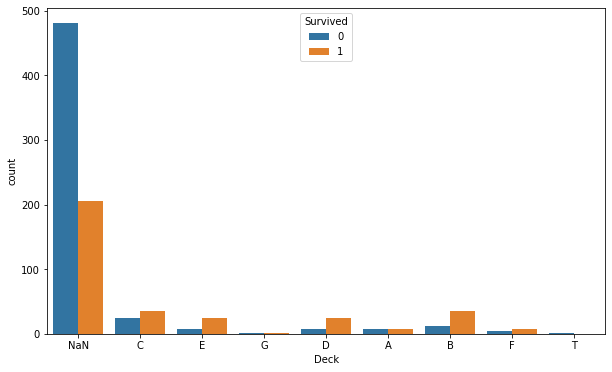

In [43]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Deck', hue='Survived', data=df_train)
plt.show()

In [44]:
survival_by_deck = pd.pivot_table(data=df_train, values='PassengerId', index='Deck', columns='Survived',  aggfunc='count', fill_value=0)
survival_by_deck['Percentage survived'] = round(survival_by_deck[1]/(survival_by_deck[0]+survival_by_deck[1])*100,1)
survival_by_deck['Percentage not-survived'] = 100 - survival_by_deck['Percentage survived']
survival_by_deck

Survived,0,1,Percentage survived,Percentage not-survived
Deck,,,,
A,8,7,46.7,53.3
B,12,35,74.5,25.5
C,24,35,59.3,40.7
D,8,25,75.8,24.2
E,8,24,75.0,25.0
F,5,8,61.5,38.5
G,2,2,50.0,50.0
NaN,481,206,30.0,70.0
T,1,0,0.0,100.0


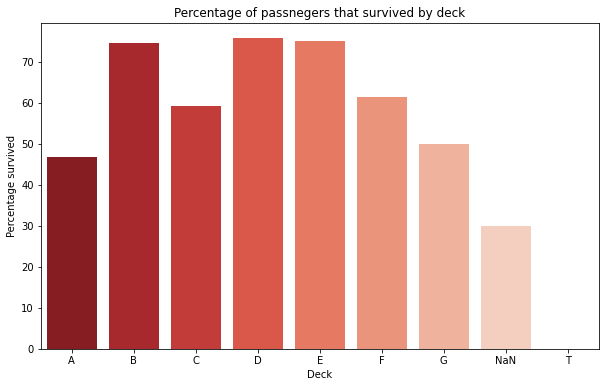

In [45]:
fig = plt.figure(figsize=(10, 6))

sns.barplot(x=survival_by_deck.index, y=('Percentage survived'),data=survival_by_deck, palette='Reds_r').set_title('Percentage of passnegers that survived by deck')

plt.show()


In [46]:
# <!-- df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
# df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
# df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

# df_all['Deck'].value_counts() -->

### Emarked


In [47]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person,Fare_ranges,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,2,40.0,"(55.9, 83.158]",B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,2,40.0,"(55.9, 83.158]",B


There are two missing values in 'Embarked'. I will deal with them in the next section.

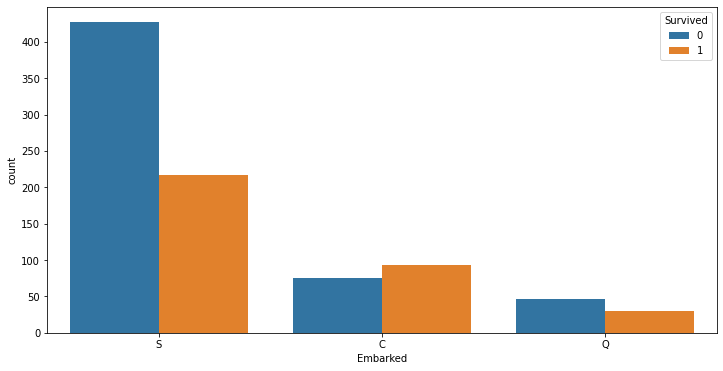

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='Embarked', hue='Survived', data=df_train)
plt.show()

The most of passengers embarked in Southampton, the least in Queenstown. Only in case of passengers that embarked in Cherbourg more survived than died in disaster.

### Name

Now let's focus on Name column. Althought names are unique and surnames are taken into account in column Falily_size we can still analyze titles of passengers.

In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person,Fare_ranges,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,7.2500,"(7.229, 7.75]",NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,71.2833,"(55.9, 83.158]",C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,7.9250,"(7.896, 8.05]",NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,26.5500,"(33.308, 55.9]",C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,8.0500,"(7.896, 8.05]",NaN


In [50]:
df_train['Title'] = df_train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [51]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person,Fare_ranges,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,7.2500,"(7.229, 7.75]",NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,71.2833,"(55.9, 83.158]",C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,7.9250,"(7.896, 8.05]",NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,26.5500,"(33.308, 55.9]",C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,8.0500,"(7.896, 8.05]",NaN,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,13.0000,"(10.5, 13.0]",NaN,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,30.0000,"(26.55, 33.308]",B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,2,11.7250,"(15.85, 24.0]",NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,30.0000,"(26.55, 33.308]",C,Mr


In [52]:
df_train.groupby('Title', dropna=False).count()['PassengerId']

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: PassengerId, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

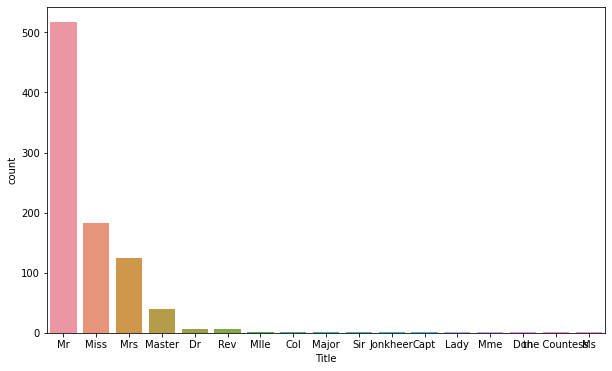

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Title',
              data = df_train,
              order = df_train['Title'].value_counts().index)
plt.show

In [54]:
### 1.1. Missing values

<function matplotlib.pyplot.show(close=None, block=None)>

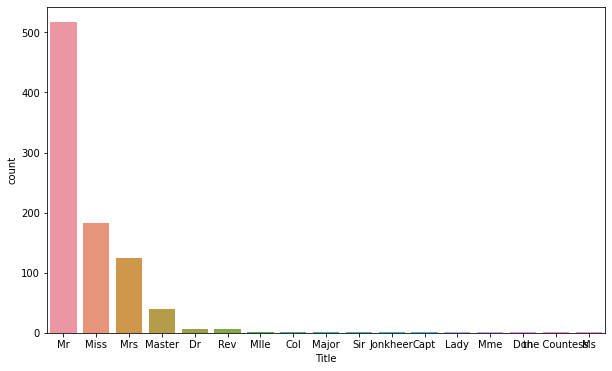

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Title',
              data = df_train,
              order = df_train['Title'].value_counts().index)
plt.show

For now I will assume that title is mostly related to sex and I will skip this in analysis. This is still field for furure improvements of the model.

## 1.1. Feature engineering and dealing with missing values. Preparing train and test dataset to further analysis

Based on what we have learnt about our dataset let's repeat feature ingineering and dealing with missing values simultaneously for train and test dataset.

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person,Fare_ranges,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,7.2500,"(7.229, 7.75]",NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,71.2833,"(55.9, 83.158]",C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,7.9250,"(7.896, 8.05]",NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,26.5500,"(33.308, 55.9]",C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,8.0500,"(7.896, 8.05]",NaN,Mr


In [57]:
df_train = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\train.csv')
df_test = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\test.csv')
df_all = pd.concat([df_train, df_test]).reset_index(drop=True)
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
pd.concat([df_train.isnull().sum(),df_test.isnull().sum()],axis=1)

,0,1
PassengerId,0,0.0
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0


### Age
First let's deal with missing values in age by replacing missing values by median age value for specific Passenger class.

In [59]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        return df_train[df_train['Pclass']==pclass]['Age'].median()
    else:
        return age
    
# def impute_age(cols):
#     age = cols[0]
#     pclass = cols[1]
    
#     age_pclass1 = round(df_train[df_train['Pclass']==1]['Age'].mean(),0)
#     age_pclass2 = round(df_train[df_train['Pclass']==2]['Age'].mean(),0)
#     age_pclass3 = round(df_train[df_train['Pclass']==3]['Age'].mean(),0)
    
#     if pd.isnull(age):
#         if pclass == 1:
#             return age_pclass1
#         elif pclass == 2:
#             return age_pclass2
#         else:
#             return age_pclass3
#     else:
#         return age

In [60]:
df_all['Age'] = df_all[['Age','Pclass']].apply(impute_age,axis=1)
df_all[df_all['Age'].isnull()]['Age']

Series([], Name: Age, dtype: float64)

<AxesSubplot:>

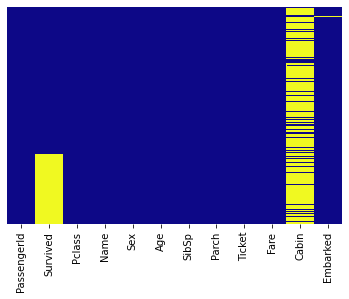

In [61]:
sns.heatmap(df_all.isnull(), yticklabels=False, cbar=False, cmap='plasma')

### SibSp & Parch
Now let's add new feature - 'Family size' based on columns 'SibSp' and 'Parch' since "Family size' is more descriptive. Then I will drop columns 'SibSp' and 'Parch'.

In [62]:
df_all['Family_size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all.drop(['SibSp','Parch'], axis=1,inplace=True)
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


### Ticket
Next, I will extract info about 'Ticket frequency' from 'Ticket' feature, and then drop Ticket' feature.

In [63]:
df_all['Ticket_frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')
df_all.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,1


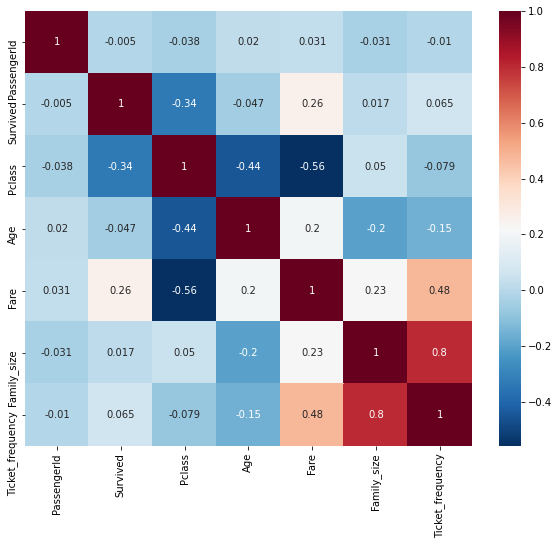

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(df_all.corr(),cmap='RdBu_r',annot=True )
plt.show()

As seen above, 'Family size' and 'Ticket frequency' are highly correlated - we can consider dropping one of them in future analysis

### Fare
There is one missing value in 'Fare'. Similarly to age, I will replace that missing value with median value in this passenger class (3rd class median)

In [65]:
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,3701,NaN,NaN,S,1,1


In [66]:
df_all[df_all['Pclass']==3]['Fare'].median()

8.05

In [67]:
# df_all.at[df_all[df_all['Fare'].isnull()]['Fare'].index.to_list()[0], 'Fare'] = df_all[df_all['Pclass']==3]['Fare'].median()
df_all['Fare'] = df_all['Fare'].fillna(df_all[df_all['Pclass']==3]['Fare'].median())

In [68]:
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_frequency


As seen in data analysis section, the amount of 'Fare' depend on 'Ticket frequency'. I will then introduce new feature 'Fare per person' and drop 'Fare'

In [69]:
df_all['Fare_per_person'] = df_all['Fare']/df_all['Ticket_frequency']
df_all.drop('Fare', axis=1, inplace=True)
df_all.sort_values(by='Fare_per_person', ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,PC 17755,B51 B53 B55,C,2,4,128.082300
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,B101,C,1,4,128.082300
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,PC 17755,NaN,C,1,4,128.082300
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,PC 17755,B51 B53 B55,C,2,4,128.082300
299,300,1.0,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,PC 17558,B58 B60,C,2,3,82.506933
1075,1076,NaN,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,PC 17558,B58 B60,C,3,3,82.506933
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,PC 17558,B58 B60,C,2,3,82.506933
1163,1164,NaN,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,13508,C89,C,2,2,68.389600
1143,1144,NaN,1,"Clark, Mr. Walter Miller",male,27.0,13508,C89,C,2,2,68.389600
334,335,1.0,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,37.0,PC 17611,NaN,S,2,2,66.825000


### Embarked

Let's check column Embarked.

In [70]:
df_all[df_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,113572,B28,NaN,1,2,40.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,113572,B28,NaN,1,2,40.0


Train set contains 2 missing values.
Quick chech names of passengers in Internet gives the following information:
* Icard, Miss. Amelie embarked from Southampton (https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)
* Stone, Mrs. George Nelson (Martha Evelyn) embarked also from Southampton(https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)
So I simply include that information in dataset.

In [71]:
# df_train[df_train['Embarked'].isnull()==True]['Embarked'].replace(np.nan,'S', inplace=True)
df_all['Embarked'] = df_all['Embarked'].fillna('S')
df_all[df_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,Family_size,Ticket_frequency,Fare_per_person


<AxesSubplot:>

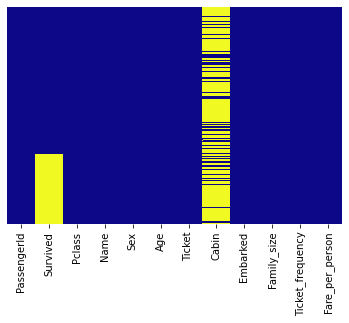

In [72]:
sns.heatmap(df_all.isnull(), yticklabels=False, cbar=False, cmap='plasma')

### Cabin
As I proposed in data analysis section, I will extract information about the 'Deck' for further analysis and drop 'Cabin' column.

In [73]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'NaN')
df_all.drop('Cabin', axis=1, inplace=True)
df_all.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Embarked,Family_size,Ticket_frequency,Fare_per_person,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,S,2,1,7.25000,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,C,2,2,35.64165,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,S,1,1,7.92500,NaN


### Dropping unnecessery columns

In [74]:
df_all.drop(['Name', 'Ticket'], axis=1, inplace=True)
df_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family_size,Ticket_frequency,Fare_per_person,Deck
0,1,0.0,3,male,22.0,S,2,1,7.25000,NaN
1,2,1.0,1,female,38.0,C,2,2,35.64165,C
2,3,1.0,3,female,26.0,S,1,1,7.92500,NaN
3,4,1.0,1,female,35.0,S,2,2,26.55000,C
4,5,0.0,3,male,35.0,S,1,1,8.05000,NaN


For now I will keep 'PassengerId' and 'Survived' columns, but I will not use ''PassengerId' in prediction model.

<AxesSubplot:>

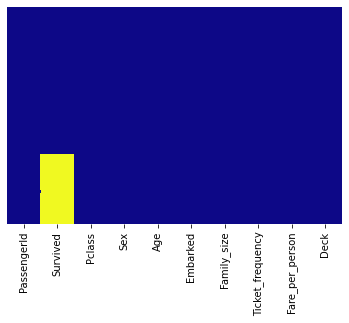

In [75]:
sns.heatmap(df_all.isnull(), yticklabels=False, cbar=False, cmap='plasma')

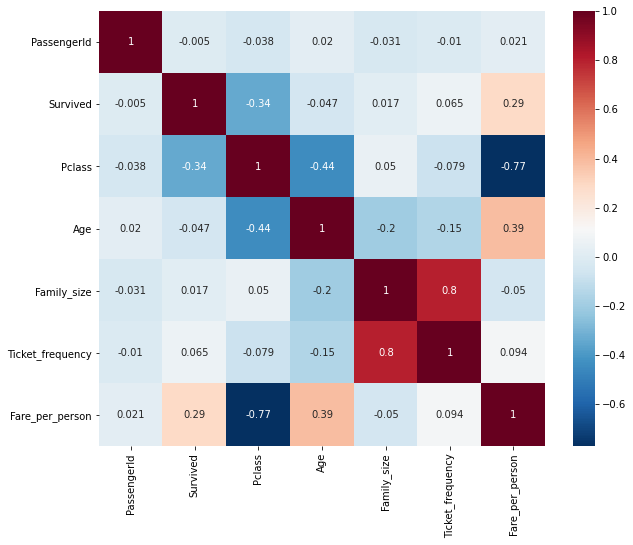

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df_all.corr(),cmap='RdBu_r',annot=True )
plt.show()

## 1.2. Converting categorical features

In [77]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   int64  
 1   Survived          891 non-null    float64
 2   Pclass            1309 non-null   int64  
 3   Sex               1309 non-null   object 
 4   Age               1309 non-null   float64
 5   Embarked          1309 non-null   object 
 6   Family_size       1309 non-null   int64  
 7   Ticket_frequency  1309 non-null   int64  
 8   Fare_per_person   1309 non-null   float64
 9   Deck              1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 102.4+ KB


In [ ]:
sex = pd.get_dummies(df_all['Sex'], drop_first=True)
embarked = pd.get_dummies(df_all['Embarked'], drop_first=True)

In [ ]:
df_train.drop(['Name','Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [ ]:
df_train = pd.concat([df_train,sex,embarked],axis=1)
df_train.head()

## 2. Building predicion model

### 2.1. Logistic regression

Since our goal is to predict 1 of 2 output results logistic regression model is my first choice.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = df_train.drop('Survived', axis=1)
y=df_train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
print(confusion_matrix(y_test, prediction))

##### Let's apply our trained model on Kaggle's test set

In [ ]:
test = pd.read_csv('test.csv')